In [18]:
%load_ext autoreload
%autoreload 2
from davidyu_cfg import *
from finquant.portfolio import build_portfolio
from functions.common.dfcf_fuquan_data import *

df_p = pd.DataFrame()
#stock_list = ["000725","600837","600036","600519","600276","601318","000333","600030","000858","002475"]
stock_list = ["601888","600887","600519","603288","300498","000333","000651","002027","002714","000858"]
#stock_list = ["000725","600837","600036","600519","600276","601318","000333","600030","000917","002475"]
#stock_list = ["002555","300413","600637","002131","002602","300418","603444","002624","002027","300251"]

#stock_list = ["000917","000089"]

#stock_index = '601398'
start_date = '2020-01-01'
end_date = '2020-12-20'
for s1 in stock_list:
    df1 = dfcf_stock_data(s1,start_date,end_date)
    df1 = df1[["dt","close","open","high","low"]].drop_duplicates()
    df_p[s1] = df1.close.values
dates = df1.dt.values
df_p.index = dates
df_p.index.name = 'Date'

pf = build_portfolio(data=df_p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
df_log_return = pf.comp_daily_log_returns()
# pf.skew
def density_plot(data): 
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    # subplots=True表示dataframe格式的数据中每一列绘制一幅子图
    p = data.plot(kind='kde', linewidth=2,  subplots=True, sharex=False)
    # p[1]代表第1个子图
#     [p[i].set_ylabel(u'密度') for i in range(k)]
    plt.legend()
    return plt
#df_log_return["002555"]
# density_plot(df_log_return.loc[:,"002555"])
# density_plot(df_log_return.loc[:,"000917"])
# density_plot(df_log_return.loc[:,"000089"])

In [20]:
def port_val(pf):
    return_data = {'expected_return':pf.expected_return,
                   'volatility':pf.volatility,
                   'sharpe':pf.sharpe,
                   'skew':pf.skew,
                   'kurtosis':pf.kurtosis}
    return return_data
port_val(pf)
pd.DataFrame(port_val(pf))

,expected_return,volatility,sharpe,skew,kurtosis
601888,0.509163,0.273029,1.846554,-0.008663,-1.824437
600887,0.509163,0.273029,1.846554,0.267917,-1.460553
600519,0.509163,0.273029,1.846554,-0.233306,-1.577150
603288,0.509163,0.273029,1.846554,0.133637,-1.345181
300498,0.509163,0.273029,1.846554,0.347652,-0.684873
000333,0.509163,0.273029,1.846554,0.569405,-0.705799
000651,0.509163,0.273029,1.846554,0.601622,-0.352177
002027,0.509163,0.273029,1.846554,0.651914,-0.851804
002714,0.509163,0.273029,1.846554,-0.062715,0.066902
000858,0.509163,0.273029,1.846554,0.158954,-1.495261


0.5091630289887819
0.273029128985883
1.8465539953975008
601888   -0.008663
600887    0.267917
600519   -0.233306
603288    0.133637
300498    0.347652
000333    0.569405
000651    0.601622
002027    0.651914
002714   -0.062715
000858    0.158954
dtype: float64
601888   -1.824437
600887   -1.460553
600519   -1.577150
603288   -1.345181
300498   -0.684873
000333   -0.705799
000651   -0.352177
002027   -0.851804
002714    0.066902
000858   -1.495261
dtype: float64
Contains information about a portfolio.
----------------------------------------------------------------------
Stocks: 601888, 600887, 600519, 603288, 300498, 000333, 000651, 002027, 002714, 000858
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.509
Portfolio Volatility: 0.273
Portfolio Sharpe Ratio: 1.847

Skewness:
     601888    600887    600519    603288    300498    000333    000651  \
0 -0.008663  0.267917 -0.233306  0.133637  0.347652  0.569405  0.601622   

     002027    002714    000858  


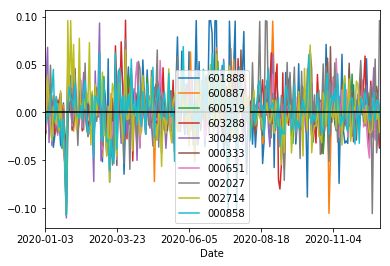

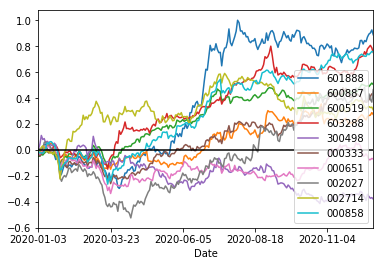

In [21]:
# expected (annualised) return
print(pf.expected_return)

# volatility
print(pf.volatility)
# Sharpe ratio (computed with a risk free rate of 0.005 by default)
print(pf.sharpe)

# ## Getting Skewness and Kurtosis of the stocks

print(pf.skew)

print(pf.kurtosis)

print(pf)
pf.properties()

# plotting daily log returns
pf.comp_daily_log_returns().plot().axhline(y=0, color="black")
# plt.show()

# # cumulative log returns
pf.comp_daily_log_returns().cumsum().plot().axhline(y=0, color="black")
# plt.show()



/home/davidyu/software/Anaconda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


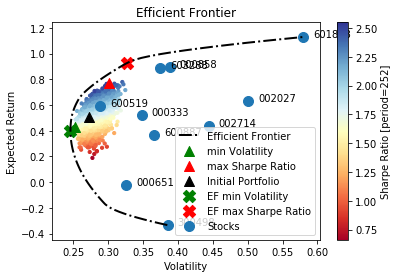

In [23]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
# plotting individual stocks
pf.plot_stocks()

In [26]:
pf.comp_weights().values

# pf.totalinvestment

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [28]:
opt_res

,Expected Return,Volatility,Sharpe Ratio
Min Volatility,0.427351,0.253297,1.667413
Max Sharpe Ratio,0.774787,0.301914,2.549688
